# Imports

In [1]:
import os
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, Normalizer, QuantileTransformer

In [2]:
# Carregando as configurações do arquivo 'config_modelo.json'
configs = json.load(open('config_modelo.json', 'r'))

In [3]:
# Criar a pasta 'save_dir' caso não exista no diretório
if not os.path.exists(configs['model']['save_dir']):
            os.makedirs(configs['model']['save_dir'])

In [4]:
# Carregar o Dataset
filepath = 'C:/Users/auW10/Documents/CodigosDoAu/000_Doutorado/dataset/'
df = pd.read_pickle(filepath+'dataset_with_TI_ciclo1_multiclass_jupyter_113TIs.pkl')
print(df.shape)
df.head(20)

(139881, 126)


,DATETIME,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,BBANDS_Upper_5,BBANDS_Lower_5,...,MES,DIA_SEMANA,HORA_NOBRE,TARGET_WIN,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL,TARGET_WIN_CAT_ENC,HOLD,SELL,BUY
0,2014-11-19 12:30:00,2014.11.19,12:30:00,53560.0,53565.0,53405.0,53410.0,8363.0,53752.526189,53227.473811,...,11,2,2,15.0,HOLD,2,1,1,0,0
1,2014-11-19 12:35:00,2014.11.19,12:35:00,53410.0,53500.0,53295.0,53415.0,7034.0,53712.281525,53317.718475,...,11,2,2,50.0,HOLD,2,1,1,0,0
2,2014-11-19 12:40:00,2014.11.19,12:40:00,53420.0,53495.0,53370.0,53490.0,4654.0,53708.292713,53311.707287,...,11,2,2,-80.0,HOLD,2,1,1,0,0
3,2014-11-19 12:45:00,2014.11.19,12:45:00,53495.0,53595.0,53410.0,53425.0,5518.0,53575.412304,53344.587696,...,11,2,2,-140.0,HOLD,2,1,1,0,0
4,2014-11-19 12:50:00,2014.11.19,12:50:00,53420.0,53545.0,53415.0,53465.0,3800.0,53503.417946,53378.582054,...,11,2,2,-195.0,SELL,1,2,0,1,0
5,2014-11-19 12:55:00,2014.11.19,12:55:00,53465.0,53525.0,53385.0,53410.0,2793.0,53503.417946,53378.582054,...,11,2,2,-225.0,SELL,1,2,0,1,0
6,2014-11-19 13:00:00,2014.11.19,13:00:00,53410.0,53435.0,53245.0,53285.0,5022.0,53556.844986,53273.155014,...,11,2,2,-140.0,HOLD,2,1,1,0,0
7,2014-11-19 13:05:00,2014.11.19,13:05:00,53285.0,53325.0,53195.0,53270.0,3724.0,53528.149610,53213.850390,...,11,2,2,-130.0,HOLD,2,1,1,0,0
8,2014-11-19 13:10:00,2014.11.19,13:10:00,53260.0,53305.0,53155.0,53185.0,4687.0,53525.049499,53120.950501,...,11,2,2,-125.0,HOLD,2,1,1,0,0
9,2014-11-19 13:15:00,2014.11.19,13:15:00,53190.0,53205.0,53100.0,53145.0,4140.0,53442.455717,53075.544283,...,11,2,2,-95.0,HOLD,2,1,1,0,0


## Split dos Dados

In [5]:
df.columns.tolist()

['DATETIME',
 'DATE',
 'TIME',
 'OPEN',
 'HIGH',
 'LOW',
 'CLOSE',
 'VOL',
 'BBANDS_Upper_5',
 'BBANDS_Lower_5',
 'BBANDS_Upper_10',
 'BBANDS_Lower_10',
 'BBANDS_Upper_20',
 'BBANDS_Lower_20',
 'DEMA_20',
 'EMA_20',
 'KAMA_5',
 'KAMA_10',
 'KAMA_20',
 'MIDPOINT_3',
 'MIDPOINT_12',
 'MIDPRICE_3',
 'MIDPRICE_12',
 'SAR_2',
 'SAR_6',
 'SAR_10',
 'SAR_14',
 'SAR_18',
 'TEMA_5',
 'TRIMA_5',
 'TRIMA_10',
 'TRIMA_20',
 'WMA_5',
 'WMA_10',
 'WMA_20',
 'ADX_3',
 'ADX_6',
 'ADX_10',
 'ADXR_3',
 'ADXR_6',
 'APO_3_12',
 'APO_5_12',
 'AROONOSC_3',
 'AROONOSC_6',
 'AROONOSC_12',
 'BOP',
 'CCI_3',
 'CCI_6',
 'CCI_12',
 'CCI_20',
 'CMO_3',
 'CMO_6',
 'CMO_12',
 'CMO_20',
 'DX_3',
 'DX_6',
 'DX_12',
 'DX_20',
 'MFI_3',
 'MFI_6',
 'MFI_12',
 'MINUS_DI_3',
 'MINUS_DI_6',
 'MINUS_DI_12',
 'MINUS_DI_20',
 'MINUS_DM_3',
 'MINUS_DM_6',
 'MINUS_DM_12',
 'MINUS_DM_20',
 'MOM_3',
 'MOM_6',
 'MOM_10',
 'MOM_14',
 'PLUS_DI_3',
 'PLUS_DI_6',
 'PLUS_DI_12',
 'PLUS_DI_20',
 'PLUS_DM_3',
 'PLUS_DM_6',
 'PLUS_DM_12',


In [6]:
print(df.shape)
df2 = df.drop([  'MES',
                 'DIA_SEMANA', 
                 'TARGET_WIN',
                 
                 'TARGET_WIN_CAT_ENC',
             
                 'HOLD',
                 'SELL',
                 'BUY'
               
              ], axis=1)
print(df2.shape)
df2.head(2)

(139881, 126)
(139881, 119)


,DATETIME,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,BBANDS_Upper_5,BBANDS_Lower_5,...,ADOSC,OBV,ATR_3,ATR_6,ATR_12,ATR_20,TRANGE,HORA_NOBRE,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL
0,2014-11-19 12:30:00,2014.11.19,12:30:00,53560.0,53565.0,53405.0,53410.0,8363.0,53752.526189,53227.473811,...,224.882410,16995.0,183.08836,157.567344,133.163314,122.7500,160.0,2,HOLD,2
1,2014-11-19 12:35:00,2014.11.19,12:35:00,53410.0,53500.0,53295.0,53415.0,7034.0,53712.281525,53317.718475,...,-968.557883,24029.0,190.39224,165.472787,139.149704,126.8625,205.0,2,HOLD,2


In [7]:
'''
             'MIDPOINT_20',
             'SAR_2',
             'SAR_6', 
             'CCI_12',
             'PPO_12_20',
             'AD',
             'ADOSC',
             'TRIX_5',
             'ROC_5',
             'APO_5_12',
'''

"\n             'MIDPOINT_20',\n             'SAR_2',\n             'SAR_6', \n             'CCI_12',\n             'PPO_12_20',\n             'AD',\n             'ADOSC',\n             'TRIX_5',\n             'ROC_5',\n             'APO_5_12',\n"

In [8]:
df_train = df2[(df2['DATETIME'] >= '2014-01-01') & (df2['DATETIME'] < '2018-01-01')]
#df_train = df_train.iloc[-10000:, :]
df_valid = df2[(df2['DATETIME'] >= '2018-01-01') & (df2['DATETIME'] < '2019-01-01')]
#df_valid = df_valid.iloc[:6600, :]
df_test  = df2[(df2['DATETIME'] >= '2019-01-01')]
#df_test = df_test.iloc[:500,:]

print('Proporção Train: {:.1%} | Validation: {:.1%} | Test: {:.1%}'.format(
                                            df_train['EMA_20'].count()/df2['EMA_20'].count(),
                                            df_valid['EMA_20'].count()/df2['EMA_20'].count(),
                                            df_test['EMA_20'].count()/df2['EMA_20'].count()))

df_train.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
df_valid.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
df_test.drop(['DATETIME', 'DATE', 'TIME'], axis=1, inplace=True)
print(df_train.shape, df_valid.shape, df_test.shape)

Proporção Train: 59.1% | Validation: 18.9% | Test: 22.0%
(82669, 116) (26410, 116) (30802, 116)


C:\Users\auW10\Anaconda3\envs\phd\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df_test.iloc[19:200].head(20)

,OPEN,HIGH,LOW,CLOSE,VOL,BBANDS_Upper_5,BBANDS_Lower_5,BBANDS_Upper_10,BBANDS_Lower_10,BBANDS_Upper_20,...,ADOSC,OBV,ATR_3,ATR_6,ATR_12,ATR_20,TRANGE,HORA_NOBRE,TARGET_WIN_CAT3,TARGET_WIN_CAT3_LABEL
109098,88095.0,88185.0,88035.0,88150.0,28664.0,88174.761226,88091.238774,88238.387032,87917.612968,88228.767784,...,28633.191133,-3220019.0,140.147904,138.857426,142.408421,142.348568,150.0,1,BUY,0
109099,88155.0,88235.0,88135.0,88215.0,43829.0,88227.201036,88072.798964,88265.352380,87938.647620,88242.138019,...,36933.665650,-3176190.0,126.765270,132.381188,138.874386,140.231139,100.0,1,BUY,0
109100,88210.0,88370.0,88210.0,88345.0,53064.0,88362.567651,88011.432349,88315.058813,87974.941187,88296.218540,...,50232.565203,-3123126.0,137.843513,136.984323,140.634854,141.219582,160.0,1,HOLD,2
109101,88350.0,88365.0,88260.0,88320.0,35294.0,88415.251156,88036.748844,88361.356717,87977.643283,88334.668262,...,53740.286921,-3158420.0,126.895675,131.653603,137.665283,139.408603,105.0,1,BUY,0
109102,88320.0,88415.0,88315.0,88365.0,38681.0,88444.336021,88113.663979,88395.471050,88015.528950,88374.346565,...,51090.454808,-3119739.0,117.930450,126.378002,134.526509,137.438173,100.0,1,BUY,0
109103,88365.0,88490.0,88340.0,88465.0,48422.0,88502.698475,88181.301525,88477.218585,87997.781415,88434.718845,...,57213.644698,-3071317.0,128.620300,130.315002,135.815967,138.066264,150.0,1,BUY,0
109104,88465.0,88535.0,88425.0,88510.0,48057.0,88547.887712,88254.112288,88552.572193,87998.427807,88499.440541,...,64476.874745,-3023260.0,122.413533,126.929168,133.664636,136.662951,110.0,1,HOLD,2
109105,88510.0,88595.0,88485.0,88540.0,41115.0,88608.641632,88271.358368,88619.508170,88007.491830,88560.245516,...,62590.020169,-2982145.0,118.275689,124.107640,131.692583,135.329804,110.0,1,HOLD,2
109106,88535.0,88785.0,88535.0,88770.0,68349.0,88797.656496,88262.343504,88760.287850,87995.712150,88664.431931,...,77797.275527,-2913796.0,162.183793,145.089700,141.551534,141.063314,250.0,1,SELL,1
109107,88765.0,88775.0,88635.0,88650.0,48386.0,88806.963633,88367.036367,88797.313052,88068.686948,88718.347974,...,65086.779952,-2962182.0,154.789195,144.241417,141.422240,141.010148,140.0,1,HOLD,2


In [10]:
df_train['TARGET_WIN_CAT3_LABEL'].value_counts()

2    67604
1     7661
0     7404
Name: TARGET_WIN_CAT3_LABEL, dtype: int64

In [11]:
df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[0]

7404

In [12]:
hold_train = df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[2]
hold_valid = df_valid['TARGET_WIN_CAT3_LABEL'].value_counts()[2]
hold_test = df_test['TARGET_WIN_CAT3_LABEL'].value_counts()[2]

print('\nDados Categóricos de Treino -- BUY: %d | SELL: %d | HOLD: %d' % (df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[0], df_train['TARGET_WIN_CAT3_LABEL'].value_counts()[1], hold_train))
print('\nDados Categóricos de Validação -- BUY: %d | SELL: %d | HOLD: %d' % (df_valid['TARGET_WIN_CAT3_LABEL'].value_counts()[0], df_valid['TARGET_WIN_CAT3_LABEL'].value_counts()[1], hold_valid))
print('\nDados Categóricos de Teste -- BUY: %d | SELL: %d | HOLD: %d' % (df_test['TARGET_WIN_CAT3_LABEL'].value_counts()[0], df_test['TARGET_WIN_CAT3_LABEL'].value_counts()[1], hold_test))



Dados Categóricos de Treino -- BUY: 7404 | SELL: 7661 | HOLD: 67604

Dados Categóricos de Validação -- BUY: 4212 | SELL: 4272 | HOLD: 17926

Dados Categóricos de Teste -- BUY: 4933 | SELL: 4677 | HOLD: 21192


In [13]:
buy_train = df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[4]
sell_train = df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[5]
hold_train = df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[3]

buy_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[4]
sell_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[5]
hold_valid = df_valid.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[3]

buy_test = df_test.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[4]
sell_test = df_test.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[5]
hold_test = df_test.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()[3]

print('\nDados Categóricos de Treino Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_train, sell_train, hold_train))
print('\nDados Categóricos de Validação Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_valid, sell_valid, hold_valid))
print('\nDados Categóricos de Teste Hora Nobre -- BUY: %d | SELL: %d | HOLD: %d' % (buy_test, sell_test, hold_test))



Dados Categóricos de Treino Hora Nobre -- BUY: 2815 | SELL: 2591 | HOLD: 17513

Dados Categóricos de Validação Hora Nobre -- BUY: 1433 | SELL: 1372 | HOLD: 4515

Dados Categóricos de Teste Hora Nobre -- BUY: 1746 | SELL: 1704 | HOLD: 5070


In [14]:
df_train.groupby(['HORA_NOBRE'])['TARGET_WIN_CAT3_LABEL'].value_counts()

HORA_NOBRE  TARGET_WIN_CAT3_LABEL
0           2                         3884
            0                          357
            1                          343
1           2                        17513
            1                         2815
            0                         2591
2           2                        46207
            1                         4503
            0                         4456
Name: TARGET_WIN_CAT3_LABEL, dtype: int64

In [15]:
np.random.seed(2345)
porcentagem_selecao_train = (buy_train / hold_train)
amostra_train = np.random.choice( a=[0,1], size=hold_train, replace=True, 
                                   p=[1-porcentagem_selecao_train, porcentagem_selecao_train] )
print(len(amostra_train))
print(len(amostra_train[amostra_train == 1]))
print(len(amostra_train[amostra_train == 0]))

17513
2822
14691


In [16]:
np.random.seed(2345)
porcentagem_selecao_valid = (buy_valid / hold_valid)
amostra_valid = np.random.choice( a=[0,1], size=hold_valid, replace=True, 
                                   p=[1-porcentagem_selecao_valid, porcentagem_selecao_valid] )
print(len(amostra_valid))
print(len(amostra_valid[amostra_valid == 1]))
print(len(amostra_valid[amostra_valid == 0]))

4515
1459
3056


In [17]:
np.random.seed(2345)
porcentagem_selecao_test = (buy_test / hold_test)
amostra_test = np.random.choice( a=[0,1], size=hold_test, replace=True, 
                                   p=[1-porcentagem_selecao_test, porcentagem_selecao_test] )
print(len(amostra_test))
print(len(amostra_test[amostra_test == 1]))
print(len(amostra_test[amostra_test == 0]))

5070
1756
3314


In [18]:
def normalize(data):

        scaler_x = StandardScaler()
        
        x = data.iloc[:, :-3]
        x = scaler_x.fit_transform(x) 
        
        y = data.iloc[:,-1]
        y_list = np.array(y.to_list())
    
        return x, y_list

In [19]:
def get_train_valid_test_data(seq_len, df, amostragem):

        a=0
        for i in range(len(df) - seq_len):
            if df['TARGET_WIN_CAT3'][i+seq_len-1] == 'HOLD':
                if amostragem[a] == 0:
                    df.drop((i+seq_len-1), axis=0, inplace=True) 
                a+=1
                    
        x, y = normalize(df)
            
        return x, y

In [20]:
df_train_reset_index = df_train[df_train['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_train, y_train = get_train_valid_test_data(seq_len=1, 
                                             df=df_train_reset_index, 
                                             amostragem=amostra_train)

In [21]:
df_valid_reset_index = df_valid[df_valid['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_valid, y_valid = get_train_valid_test_data(seq_len=1, 
                                             df=df_valid_reset_index, 
                                             amostragem=amostra_valid)

In [22]:
df_test_reset_index = df_test[df_test['HORA_NOBRE'] == '1'].reset_index(drop=True)
x_test, y_test = get_train_valid_test_data(seq_len=1, 
                                             df=df_test_reset_index, 
                                             amostragem=amostra_test)

In [23]:
len(x_train)

8229

In [24]:
len(y_train)

8229

In [25]:
x_train.shape

(8229, 113)

In [26]:
x_train

array([[-0.28873757, -0.28765066, -0.28850159, ...,  0.60110201,
         0.72881744,  0.09220034],
       [-0.29087974, -0.29514882, -0.29385723, ...,  0.74337889,
         0.83471405, -0.15469734],
       [-0.29141529, -0.29782673, -0.2927861 , ...,  0.48085258,
         0.67696752, -0.58676828],
       ...,
       [ 2.0821111 ,  2.07748246,  2.08779684, ..., -1.55054737,
        -1.50236274, -1.20401248],
       [ 2.07889785,  2.0731978 ,  2.08083451, ..., -1.63070549,
        -1.59630592, -0.89539038],
       [ 2.0821111 ,  2.07694688,  2.08726128, ..., -1.73996546,
        -1.68533536, -1.20401248]])

In [27]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

# Modelos

In [28]:
import lightgbm as lgbm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## LightGBM

In [29]:
model_lgbm = lgbm.LGBMClassifier(n_jobs=-1, random_state=0, n_estimators=10000, learning_rate=0.001, num_leaves=2**6,
                                subsample=0.9, subsample_freq=1, colsample_bytree=1.)

model_lgbm.fit(x_train, y_train)
predict_lgbm = model_lgbm.predict(x_test)

print('Accuracy Score - LightGBM: ', accuracy_score(y_test, predict_lgbm))

Accuracy Score - LightGBM:  0.3992702131745727


In [30]:
print(classification_report(y_test, predict_lgbm))

              precision    recall  f1-score   support

           0       0.37      0.36      0.37      1746
           1       0.39      0.35      0.37      1704
           2       0.44      0.48      0.46      1757

    accuracy                           0.40      5207
   macro avg       0.40      0.40      0.40      5207
weighted avg       0.40      0.40      0.40      5207



In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_lgbm)
confusion_matrix

array([[632, 531, 583],
       [590, 598, 516],
       [485, 423, 849]], dtype=int64)

In [32]:
len(y_test)

5207

<AxesSubplot:>

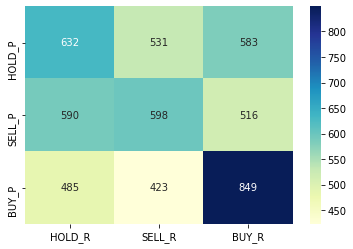

In [33]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['HOLD_R', 'SELL_R', 'BUY_R'], 
                        index=['HOLD_P', 'SELL_P', 'BUY_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Compare train and test set accuracy

In [34]:
y_pred_train = model_lgbm.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9978


### Check for Overfitting

In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_lgbm.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model_lgbm.score(x_test, y_test)))

Training set score: 0.9978
Test set score: 0.3993


In [36]:
print('Validation set score: {:.4f}'.format(model_lgbm.score(x_valid, y_valid)))

Validation set score: 0.3885


## Random Forest

In [37]:
model_randomF = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=15000)
model_randomF.fit(x_train, y_train)
predict_randomF = model_randomF.predict(x_test)

print('Accuracy Score - Random Forest: ', accuracy_score(y_test, predict_randomF))

Accuracy Score - Random Forest:  0.39984636066833107


In [38]:
print(classification_report(y_test, predict_randomF))

              precision    recall  f1-score   support

           0       0.38      0.30      0.33      1746
           1       0.38      0.38      0.38      1704
           2       0.43      0.52      0.47      1757

    accuracy                           0.40      5207
   macro avg       0.40      0.40      0.39      5207
weighted avg       0.40      0.40      0.39      5207



In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict_randomF)
confusion_matrix

array([[518, 584, 644],
       [473, 642, 589],
       [380, 455, 922]], dtype=int64)

<AxesSubplot:>

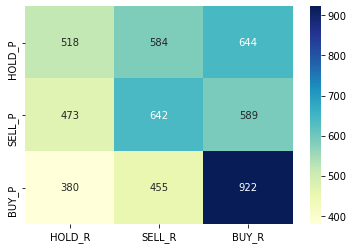

In [40]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['HOLD_R', 'SELL_R', 'BUY_R'], 
                        index=['HOLD_P', 'SELL_P', 'BUY_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Compare train and test set accuracy

In [41]:
y_pred_train = model_randomF.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


### Check for Overfitting

In [42]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_randomF.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model_randomF.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.3998


In [43]:
print('Validation set score: {:.4f}'.format(model_randomF.score(x_valid, y_valid)))

Validation set score: 0.3984


# Deep Learning

In [44]:
# Encoding categorical data
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder_Y_1 = LabelEncoder()
yy = labelencoder_Y_1.fit_transform(y_train)
y_train2 = to_categorical(yy)

labelencoder_Y_1 = LabelEncoder()
yy = labelencoder_Y_1.fit_transform(y_test)
y_test2 = to_categorical(yy)

labelencoder_Y_1 = LabelEncoder()
yy = labelencoder_Y_1.fit_transform(y_valid)
y_valid2 = to_categorical(yy)

print(y_valid2[10:20])
print(y_valid[10:20])

# BUY | SELL | HOLD

Using TensorFlow backend.


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[2 0 1 2 2 2 2 0 2 1]


In [45]:
# example of training a final classification model
from keras.models import Sequential, load_model
from core.utils import Timer
from keras.layers import Dense, Dropout, LSTM, GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD, Adam
dim = x_train.shape[1]

# define and fit the final model
timer = Timer()
timer.start()

model = Sequential()

model.add(Dense(100, input_dim=dim, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('[Model] Model Compiled')
print(model.summary())
timer.stop()




Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[Model] Model Compiled
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               11400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 75)                7575      
_________________________________________________________________
dropout_2 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3800      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
________________

In [46]:
timer = Timer()
timer.start()
print('[Model] Training Started')

save_dir=configs['model']['save_dir']
my_model=configs['model']['model_name']
save_fname = os.path.join(save_dir, '%s.h5' % my_model)

batch_size=configs['training']['batch_size']

callbacks = [ ModelCheckpoint(filepath=save_fname, monitor='loss', save_best_only=True)]

H = model.fit( x_train, y_train2, validation_data=(x_valid, y_valid2), epochs=100, 
               callbacks=callbacks, workers=1 )

model.save(save_fname)

print('[Model] Training Completed.')
print('Model saved as %s' % save_fname)

timer.stop()


[Model] Training Started

Train on 8229 samples, validate on 4265 samples
Epoch 1/100
8229/8229 [==============================] - 23s 3ms/step - loss: 1.1250 - accuracy: 0.3420 - val_loss: 1.0909 - val_accuracy: 0.3740
Epoch 2/100
8229/8229 [==============================] - 13s 2ms/step - loss: 1.0966 - accuracy: 0.3642 - val_loss: 1.0880 - val_accuracy: 0.3932
Epoch 3/100
8229/8229 [==============================] - 14s 2ms/step - loss: 1.0896 - accuracy: 0.3840 - val_loss: 1.0813 - val_accuracy: 0.3906
Epoch 4/100
8229/8229 [==============================] - 15s 2ms/step - loss: 1.0862 - accuracy: 0.3773 - val_loss: 1.0796 - val_accuracy: 0.4028loss: 1.0866 - accu - ETA: 
Epoch 5/100
8229/8229 [==============================] - 14s 2ms/step - loss: 1.0830 - accuracy: 0.3895 - val_loss: 1.0787 - val_accuracy: 0.3939
Epoch 6/100
8229/8229 [==============================] - 14s 2ms/step - loss: 1.0838 - accuracy: 0.3894 - val_loss: 1.0794 - val_accuracy: 0.4091
Epoch 7/100
8229/8229 [

8229/8229 [==============================] - 14s 2ms/step - loss: 1.0329 - accuracy: 0.4480 - val_loss: 1.0894 - val_accuracy: 0.3920
Epoch 48/100
8229/8229 [==============================] - 14s 2ms/step - loss: 1.0386 - accuracy: 0.4408 - val_loss: 1.0964 - val_accuracy: 0.4014
Epoch 49/100
8229/8229 [==============================] - 15s 2ms/step - loss: 1.0340 - accuracy: 0.4512 - val_loss: 1.1010 - val_accuracy: 0.3970
Epoch 50/100
8229/8229 [==============================] - 14s 2ms/step - loss: 1.0355 - accuracy: 0.4478 - val_loss: 1.0914 - val_accuracy: 0.3927
Epoch 51/100
8229/8229 [==============================] - 14s 2ms/step - loss: 1.0353 - accuracy: 0.4415 - val_loss: 1.1039 - val_accuracy: 0.3955
Epoch 52/100
8229/8229 [==============================] - 15s 2ms/step - loss: 1.0335 - accuracy: 0.4478 - val_loss: 1.1010 - val_accuracy: 0.3894
Epoch 53/100
8229/8229 [==============================] - 14s 2ms/step - loss: 1.0351 - accuracy: 0.4521 - val_loss: 1.0904 - val_a

8229/8229 [==============================] - 14s 2ms/step - loss: 0.9879 - accuracy: 0.4823 - val_loss: 1.1760 - val_accuracy: 0.3913
Epoch 99/100
8229/8229 [==============================] - 14s 2ms/step - loss: 0.9869 - accuracy: 0.4936 - val_loss: 1.1418 - val_accuracy: 0.3923
Epoch 100/100
8229/8229 [==============================] - 14s 2ms/step - loss: 0.9872 - accuracy: 0.4872 - val_loss: 1.1365 - val_accuracy: 0.3831y:  - ETA: 1s - loss: 0.9864 - accu - ETA: 0s - loss: 0.9860 - 
[Model] Training Completed.
Model saved as saved_models\prototipo_ciclo1_multiclass_jupyter.h5
Time taken: 0:25:22.125285


In [47]:
# new instances where we do not know the answer
y_pred = model.predict(x_test) 
y_pred

array([[0.31563163, 0.3053172 , 0.37905118],
       [0.28930646, 0.2311054 , 0.47958815],
       [0.29101348, 0.27321836, 0.43576822],
       ...,
       [0.42474365, 0.3542176 , 0.22103876],
       [0.4903741 , 0.28109428, 0.22853167],
       [0.36632475, 0.3558893 , 0.27778602]], dtype=float32)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


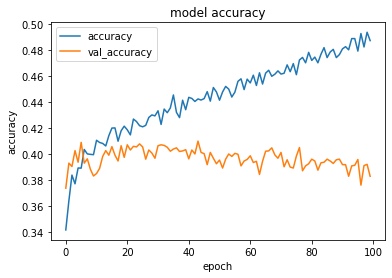

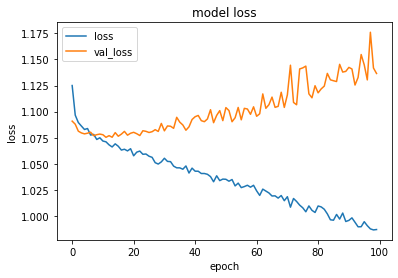

In [48]:
# list all data in history       
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
fig_path = 'accuracy_history.png'
plt.savefig(fig_path)     
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
fig_path = 'loss_history.png'
plt.savefig(fig_path) 
plt.show()

In [49]:
# BUY | SELL | HOLD

labels = ['BUY', 'SELL', 'HOLD'] 

pred = []
for i in y_pred:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
for i in y_test2:
    real.append(np.argmax(i))
real_array = np.array(real)    

In [50]:
print(y_pred[10:20])
print(y_test2[10:20])

[[0.302133   0.2509894  0.44687757]
 [0.30140275 0.2603966  0.43820062]
 [0.29958937 0.2754415  0.42496914]
 [0.303117   0.23326679 0.46361628]
 [0.3007541  0.2675817  0.4316642 ]
 [0.3104446  0.29914925 0.39040613]
 [0.35983092 0.32202864 0.31814048]
 [0.3010633  0.25140637 0.44753033]
 [0.3013478  0.24616267 0.4524895 ]
 [0.30046424 0.2705472  0.42898858]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [51]:
print(pred_array[10:20])
print(real_array[10:20])

[2 2 2 2 2 2 0 2 2 2]
[0 0 0 2 1 2 0 2 0 0]


In [52]:
print('Accuracy Score - DL: ', accuracy_score(real_array, pred_array))

Accuracy Score - DL:  0.3960053773766084


In [53]:
print(classification_report(real_array, pred_array))

              precision    recall  f1-score   support

           0       0.38      0.41      0.40      1746
           1       0.36      0.27      0.31      1704
           2       0.43      0.50      0.46      1757

    accuracy                           0.40      5207
   macro avg       0.39      0.39      0.39      5207
weighted avg       0.39      0.40      0.39      5207



In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(real_array, pred_array)
confusion_matrix

array([[722, 432, 592],
       [664, 456, 584],
       [511, 362, 884]], dtype=int64)

<AxesSubplot:>

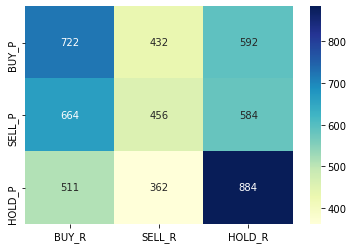

In [55]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=confusion_matrix,
                        columns=['BUY_R', 'SELL_R', 'HOLD_R'], 
                        index=['BUY_P', 'SELL_P', 'HOLD_P'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Compare train and test set accuracy

In [56]:
y_pred_train = model.predict(x_train)

labels = ['BUY', 'SELL', 'HOLD'] 

pred = []
for i in y_pred_train:
    pred.append(np.argmax(i))
pred_array = np.array(pred)       

real = []
for i in y_train2:
    real.append(np.argmax(i))
real_array = np.array(real)    

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(real_array, pred_array)))

Training-set accuracy score: 0.5540
